In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Задаём количество выборок, их размеры:

In [2]:
m = 100
n = 1000

Сгенерируем лейблы  к графикам оценок:

In [9]:
labels = ['$2 \overline{X}$', '$(n + 1) X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{(n + 1)}{n} X_{(n)}$']

Для удобства определим функцию, генерирующую m выборок размера n для различных параметров $\theta$, а также считающую квадратичную функцию потерь и строящую график усредненной функции потерь в зависимости от n:

In [10]:
def uniform_distribution_generator(theta) :
    sample = []
    for i in range(m) :
        sample.append(sps.uniform.rvs(loc = 0, scale = theta, size = n))
    evals = np.zeros((m, n, 4))
    means = []
    maximums = []
    minimums = []
    for j in range(m):
        means.append([np.mean(sample[j][:(i + 1)]) for i in range(n)])
        maximums.append([np.max(sample[j][:(i + 1)]) for i in range(n)])
        minimums.append([np.min(sample[j][:(i + 1)]) for i in range(n)])
        evals[j][:,0] = [2 * means[j][i] for i in range(n)]
        evals[j][:,1] = [(i + 2) * minimums[j][i] for i in range(n)]
        evals[j][:,2] = [maximums[j][i] + minimums[j][i] for i in range(n)]
        evals[j][:,3] = [maximums[j][i] * ((i + 2.) / (i + 1.) ) for i in range(n)]
    quad_eval = list(map(lambda x : (x - theta) ** 2, evals))
    quad_mean = []
    for k in range(4) :
        quad_mean.append([np.mean([quad_eval[j][i][k] for j in range(m)]) for i in range(n)])
    points = [i for i in range(n)]
    plt.figure(figsize=(15,5))
    for j in range(4):
        plot = plt.plot(points, [quad_mean[j][i] for i in points], label = labels[j])
        plt.legend()
    plt.show()

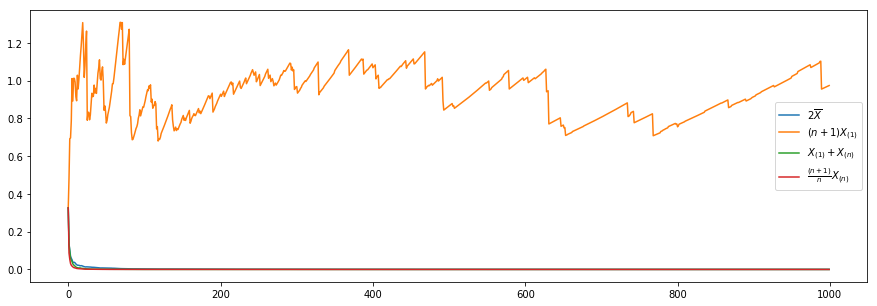

In [11]:
uniform_distribution_generator(1)

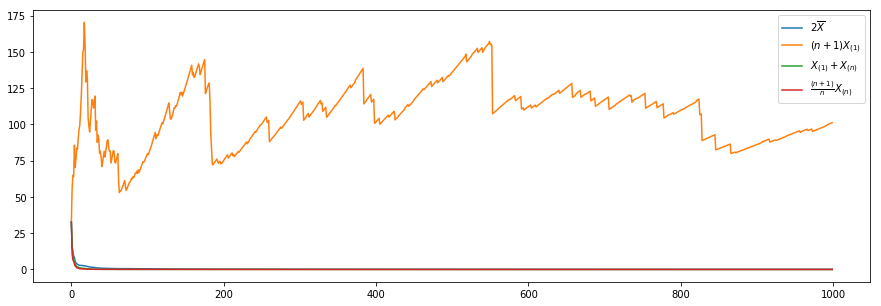

In [12]:
uniform_distribution_generator(10)

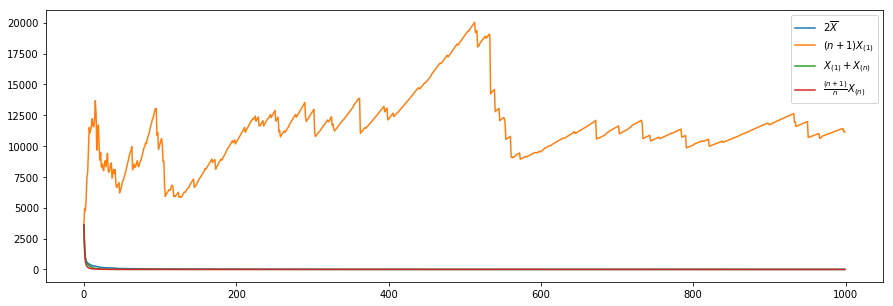

In [13]:
uniform_distribution_generator(100)

По построенным графикам можно сделать вывод о том, что оценка $(n + 1)X_{(1)}$ опять оказалась хуже остальных.